In [ ]:
!pip install -U --force-reinstall --no-cache-dir numpy==2.0.2 scipy==1.16.1 scikit-learn==1.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 239.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 245.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 236.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 308.1 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Foun

In [ ]:
###############################################################
# Importação da base de dados imdb_labelled.txt               #
# O método vai abrir uma combo-box para selecionar o arquivo. #
# O arquivo será carregado na variável uploaded.              #
###############################################################

from google.colab import files

uploaded = files.upload()

Saving imdb_labelled.txt to imdb_labelled.txt


In [ ]:
import pandas as pd
import io

# Carregando a base
df = pd.read_csv(io.BytesIO(uploaded['imdb_labelled.txt']), sep='\t')

In [ ]:
# Renomeando as colunas para padronizar
df.columns = ['text', 'target']

In [ ]:
# Testando se o dataframe carregou certo
print(df.head())
print(df.groupby('target').count())

                                                text  target
0  A very, very, very slow-moving, aimless movie ...       0
1  Not sure who was more lost - the flat characte...       0
2  Attempting artiness with black & white and cle...       0
3       Very little music or anything to speak of.         0
4  The best scene in the movie was when Gerardo i...       1
        text
target      
0        362
1        386


In [ ]:
##############################################################
# Verificação de percentual de balanceamento                 #
##############################################################
contagem_classes = df.groupby('target')['target'].count()
total = contagem_classes.sum()
porcentagem_classes = contagem_classes / total * 100
print(porcentagem_classes)

target
0    48.395722
1    51.604278
Name: target, dtype: float64


In [ ]:
##############################################################
# Separação X e y                                            #
##############################################################
X = df['text']
y = df['target']

In [ ]:
##############################################################
# Split treino e teste                                       #
##############################################################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [ ]:
##############################################################
# Vetorização TF-IDF                                         #
##############################################################
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)


In [ ]:
##############################################################
# Modelo Random Forest                                       #
##############################################################
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)


RandomForestClassifier()

In [ ]:
# Predição
y_pred = model.predict(X_test_tfidf)
y_proba = model.predict_proba(X_test_tfidf)[:,1]

In [ ]:
##############################################################
# Métricas                                                   #
##############################################################
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6951871657754011
Precision: 0.6770833333333334
Recall: 0.7142857142857143


In [ ]:
# Área sob a curva ROC
area = metrics.roc_auc_score(y_test, y_proba)
print("AUC:", area)


AUC: 0.7603594322344323


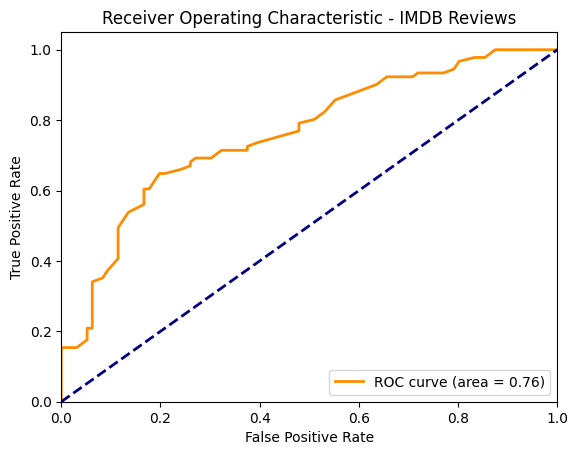

In [ ]:
# Curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - IMDB Reviews')
plt.legend(loc="lower right")
plt.show()